In [1]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.cluster import KMeans
from msresist.comp_estimator import ComHyperPar, MyOwnKMEANS
from msresist.plsr import FilteringOutPeptides, ClusterAverages, GridSearch_CV, MeasuredVsPredicted_LOOCVplot
import scipy as sp, numpy as np, pandas as pd, math
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import warnings
warnings.simplefilter("ignore")

In [2]:
X = np.array(pd.read_csv('./msresist/data/Merged_BRs.csv', header=0))
Y = np.array(pd.read_csv('./msresist/data/ydata.csv', header=0))
treatments = np.array(pd.read_csv('./msresist/data/ms-initial.csv', header=None))[0,2:]
peptide_phosphosite = X[:,0]
protein_description = X[:,1]

ProtNames = []
for item in protein_description:
    ProtName = item.split("OS")[0]
    ProtNames.append(ProtName)


ProtNames2 = []
y = list(map(lambda  v : ProtNames2.append(v.split("OS")[0]), protein_description))

    
PC9 = X[:,2]
Erl = X[:,3]
R428 = X[:,4]
Erl_R428 = X[:,5]
Erl_HGF = X[:,6]
Erl_FGF = X[:,7]
Erl_IGF = X[:,8]
KO_Erl = X[:,9]
KO_R428 = X[:,10]
KO_Erl_R428 = X[:,11]

# Variables: X phosphopeptides 
X = np.concatenate([PC9,Erl,R428,Erl_R428,Erl_HGF,Erl_FGF,Erl_IGF,KO_Erl,KO_R428,KO_Erl_R428])
X = np.reshape(X,(10,994))
X_F = FilteringOutPeptides(X)

# Observations: Y cell viability  (average between BR 3 and 4 at 72h)
Y_cv = Y[:,2]
Y_cv = Y_cv[:10]

In [7]:
CVresults_max, CVresults_min, best_params = ComHyperPar(X_F, Y_cv, ProtNames, peptide_phosphosite)
display(CVresults_min)
print(best_params)

,#Clusters,#Components,mean_test_scores,mean_train_scores
0,2,1,-16.732799,-7.848814e+00
1,2,2,-11.700713,-7.143853e+00
2,3,1,-9.018986,-6.627145e+00
3,3,2,-10.921728,-6.176875e+00
4,3,3,-12.557012,-6.042068e+00
5,4,1,-9.620441,-7.120509e+00
6,4,2,-10.654035,-6.032038e+00
7,4,3,-20.817093,-4.864957e+00
8,4,4,-22.026137,-4.711607e+00
9,5,1,-9.716824,-6.854562e+00


{'kmeans__n_clusters': 3, 'plsr__n_components': 1}


In [10]:
# plt.plot(MSE_training)
# plt.plot(MSE_test)

In [11]:
estimators = [('kmeans', MyOwnKMEANS(4, ProtNames, peptide_phosphosite)), ('plsr', PLSRegression(2))]
pipe = Pipeline(estimators)

In [12]:
X_scores, Y_scores = pipe.fit_transform(X_F,Y_cv)
PC1_scores, PC2_scores = X_scores[:, 0], X_scores[:, 1]
PC1_xload, PC2_xload = pipe.named_steps.plsr.x_loadings_[:, 0], pipe.named_steps.plsr.x_loadings_[:, 1]
PC1_yload, PC2_yload = pipe.named_steps.plsr.y_loadings_[:, 0], pipe.named_steps.plsr.y_loadings_[:, 1]

Pearson's R:  0.768878660100279 
 p-value:  0.009343704025226779


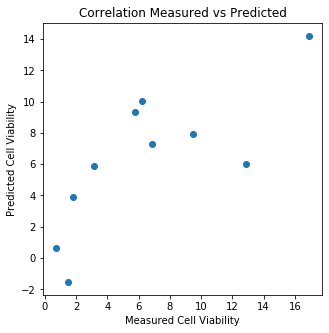

In [13]:
fig, axs = plt.subplots(1,1,figsize=(5,5))
MeasuredVsPredicted_LOOCVplot(X_F,Y_cv, pipe, fig, "none", axs)
plt.title("Correlation Measured vs Predicted")
plt.xlabel("Measured Cell Viability")
plt.ylabel("Predicted Cell Viability")
plt.savefig('Measured_Predict_5cl2co_pipe.pdf')
plt.show()

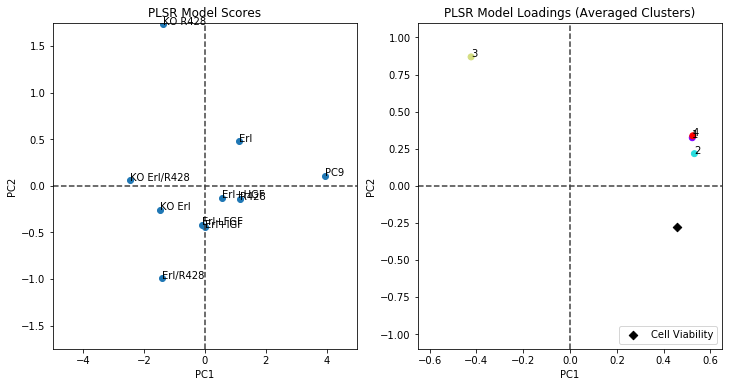

In [14]:
fig, axs = plt.subplots(1, 2,figsize=(12,6))
colors_ = cm.rainbow(np.linspace(0, 1, 4))

axs[0].scatter(PC1_scores,PC2_scores)
for j, txt in enumerate(treatments):
    axs[0].annotate(txt, (PC1_scores[j], PC2_scores[j]))
axs[0].set_title('PLSR Model Scores')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].axhline(y=0, color='0.25', linestyle='--')
axs[0].axvline(x=0, color='0.25', linestyle='--')
axs[0].set_xlim([-5, 5])
axs[0].set_ylim([-1.75, 1.75])

for i, txt in enumerate(["1", "2", "3", "4"]):
    axs[1].annotate(txt, (PC1_xload[i], PC2_xload[i]))
axs[1].scatter(PC1_xload, PC2_xload, c=np.arange(4), cmap=colors.ListedColormap(colors_))
axs[1].scatter(PC1_yload, PC2_yload, color='#000000', marker='D', label='Cell Viability')
axs[1].legend(loc=4)
axs[1].set_title('PLSR Model Loadings (Averaged Clusters)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].axhline(y=0, color='0.25', linestyle='--')
axs[1].axvline(x=0, color='0.25', linestyle='--')
axs[1].set_xlim([-0.65, 0.65])
axs[1].set_ylim([-1.1, 1.1])
plt.savefig('scores_loadings.pdf')
plt.show()

In [15]:
print(treatments)

['PC9' 'Erl' 'R428' 'Erl/R428' 'Erl+HGF' 'Erl+FGF' 'Erl+IGF' 'KO Erl'
 'KO R428' 'KO Erl/R428']


In [16]:
ClusterMembers = pipe.named_steps.kmeans.ClusterMembers(X_F)
count = sum(len(v) for v in ClusterMembers.values())
CM_df = pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in ClusterMembers.items() ]))

In [17]:
from IPython.display import HTML
import base64

def create_download_link(df, title = "Download CSV file", filename = "ClusterMembers_5cl_2Comp_MergedBRs.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(CM_df)